<a href="https://colab.research.google.com/github/Priyaaa1/dog-vs-cat/blob/main/dogs_vs_cats_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:39<00:00, 31.0MB/s]
100% 1.06G/1.06G [00:39<00:00, 28.7MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [8]:
# generators
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256),
)
validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# normalize
def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [19]:
# Creating CNN Model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 32)      128       
 chNormalization)                                                
                                                      

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
625/625 [==============================] - 59s 87ms/step - loss: 0.7081 - accuracy: 0.6451 - val_loss: 0.5754 - val_accuracy: 0.7098
Epoch 2/10
625/625 [==============================] - 57s 90ms/step - loss: 0.5087 - accuracy: 0.7493 - val_loss: 0.5229 - val_accuracy: 0.7474
Epoch 3/10
625/625 [==============================] - 52s 83ms/step - loss: 0.4153 - accuracy: 0.8097 - val_loss: 0.6382 - val_accuracy: 0.7132
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.3210 - accuracy: 0.8607 - val_loss: 0.4665 - val_accuracy: 0.7876
Epoch 5/10
625/625 [==============================] - 55s 88ms/step - loss: 0.2242 - accuracy: 0.9063 - val_loss: 0.6690 - val_accuracy: 0.7520
Epoch 6/10
625/625 [==============================] - 52s 82ms/step - loss: 0.1511 - accuracy: 0.9411 - val_loss: 0.6413 - val_accuracy: 0.8026
Epoch 7/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0996 - accuracy: 0.9631 - val_loss: 0.8584 - val_accuracy:

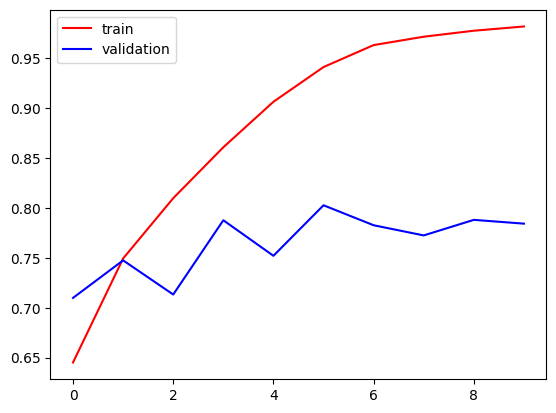

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red', label='train')
plt.plot(history.history['val_accuracy'],color='blue', label='validation')
plt.legend()
plt.show()


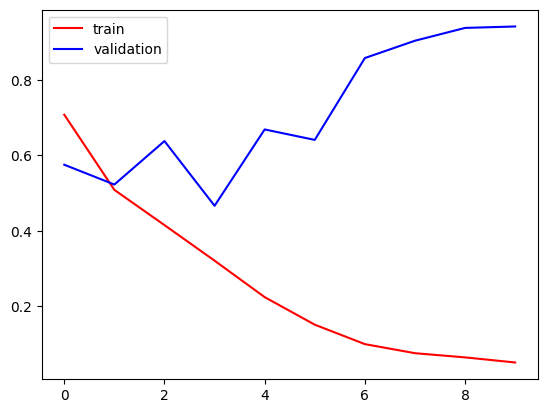

In [24]:
plt.plot(history.history['loss'],color='red', label='train')
plt.plot(history.history['val_loss'],color='blue', label='validation')
plt.legend()
plt.show()

# Testing our Model

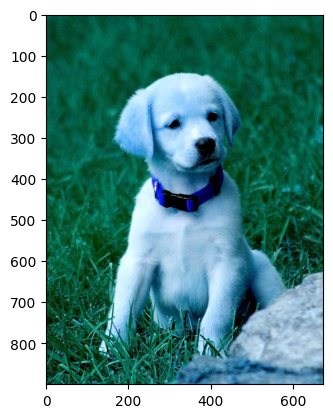

In [25]:
import cv2

test_img = cv2.imread('/content/dog.jpg')
plt.imshow(test_img)

In [26]:
test_img.shape

(900, 675, 3)

In [27]:
test_img = cv2.resize(test_img, (256,256))

In [28]:
test_input = test_img.reshape((1,256,256,3))

In [29]:
model.predict(test_input)

1/1 [==============================] - 0s 393ms/step


array([[1.]], dtype=float32)

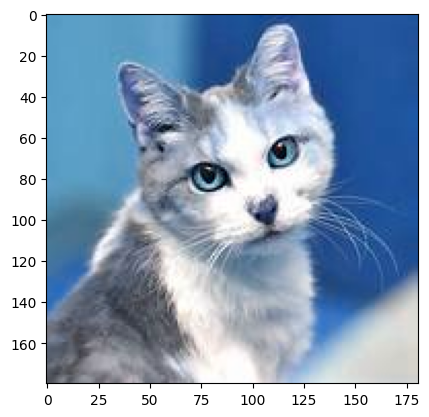

In [32]:
test_img2 = cv2.imread('/content/cat.jpg')
plt.imshow(test_img2)

In [33]:
test_img2.shape

(180, 181, 3)

In [34]:
test_img2 = cv2.resize(test_img2, (256,256))

In [35]:
test_input2 = test_img2.reshape((1,256,256,3))

In [36]:
model.predict(test_input2)

1/1 [==============================] - 0s 32ms/step


array([[0.]], dtype=float32)